# **Insurance Prediction**

## Import

In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

Read data

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [4]:
df.shape

(1338, 13)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

## Data Preprocessing

For predicting charges we can`t use features like claim Amount and Hospital_expenditure, Because it doesnot get upfront

In [6]:
df.drop(['Claim_Amount','Hospital_expenditure'],axis=1,inplace=True)

Correlation between features

In [7]:
df.select_dtypes('number').corr()

,age,bmi,children,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.112849,0.041558,0.169275,0.517930,0.363041,0.164328,0.294390
bmi,0.112849,1.000000,0.007944,0.131246,0.136368,0.137575,0.241941,0.198794
children,0.041558,0.007944,1.000000,0.054787,0.163522,0.185607,0.040070,0.070747
past_consultations,0.169275,0.131246,0.054787,1.000000,0.562344,0.503798,0.596322,0.629836
num_of_steps,0.517930,0.136368,0.163522,0.562344,1.000000,0.850089,0.739426,0.890642
NUmber_of_past_hospitalizations,0.363041,0.137575,0.185607,0.503798,0.850089,1.000000,0.743466,0.823581
Anual_Salary,0.164328,0.241941,0.040070,0.596322,0.739426,0.743466,1.000000,0.954255
charges,0.294390,0.198794,0.070747,0.629836,0.890642,0.823581,0.954255,1.000000


In [8]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [9]:
df.isna().sum()

age                                9
sex                                0
bmi                                3
children                           5
smoker                             0
past_consultations                 6
num_of_steps                       3
NUmber_of_past_hospitalizations    2
Anual_Salary                       6
region                             0
charges                            0
dtype: int64

In [10]:
df.age.mean()

39.31000752445448

In [11]:
replace_age = df.age.value_counts().values[0]

In [12]:
df['age'] = df['age'].fillna(replace_age)

In [13]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [14]:
df['children'].value_counts()

children
0.0    574
1.0    321
2.0    240
3.0    156
4.0     25
5.0     17
Name: count, dtype: int64

In [15]:
df['children'] = df['children'].fillna(0.0)

In [16]:
# df['past_consultations'] = df['past_consultations'].fillna(20.0)

In [17]:
from sklearn.neighbors import KNeighborsRegressor

Handle null values from past consultations

In [18]:
train_data = df[(~ df['past_consultations'].isna())]

In [19]:
test_data = df[(df['past_consultations'].isna())]

In [20]:
X,y = train_data[['charges']],train_data['past_consultations']

In [21]:
knn = KNeighborsRegressor()
knn.fit(X,y)

KNeighborsRegressor()

In [22]:
df.loc[df['past_consultations'].isnull(),'past_consultations']=knn.predict(test_data[['charges']])

Handle null values from num_of_steps

In [23]:
train_data = df[(~ df['num_of_steps'].isna())]
train_data.head()

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,17.0,715428.0,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,7.0,699157.0,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,19.0,702341.0,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,11.0,700250.0,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,16.0,711584.0,0.0,23012320.01,southeast,1137.0110


In [24]:
test_data = df[(df['num_of_steps'].isna())]
test_data

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
8,18.0,male,43.010,0.0,no,17.0,NaN,0.0,58881971.93,southeast,1149.39590
131,18.0,male,26.180,2.0,no,4.0,NaN,0.0,22279971.14,southeast,2304.00220
284,30.0,male,27.645,1.0,no,17.0,NaN,1.0,33613088.40,northeast,4237.12655


In [25]:
X,y = train_data[['charges']],train_data[['num_of_steps']]

In [26]:
knn = KNeighborsRegressor()
knn.fit(X,y)

KNeighborsRegressor()

In [27]:
df.loc[df['num_of_steps'].isna(),'num_of_steps'] = knn.predict(test_data[['charges']])

In [28]:
train_data = df[(~ df['NUmber_of_past_hospitalizations'].isna())]
train_data.head()

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,17.0,715428.0,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,7.0,699157.0,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,19.0,702341.0,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,11.0,700250.0,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,16.0,711584.0,0.0,23012320.01,southeast,1137.0110


In [29]:
test_data = df[(df['NUmber_of_past_hospitalizations'].isna())]
test_data.head()

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
12,19.0,male,20.7,0.0,no,4.0,723928.0,NaN,9.462889e+07,southwest,1242.816
1314,52.0,male,41.8,2.0,yes,38.0,1083344.0,NaN,2.329953e+09,southeast,47269.854


In [30]:
X,y = train_data[['charges']],train_data[['NUmber_of_past_hospitalizations']]

In [31]:
knn = KNeighborsRegressor()
knn.fit(X,y)

KNeighborsRegressor()

In [32]:
df.loc[df['NUmber_of_past_hospitalizations'].isna(),'NUmber_of_past_hospitalizations'] = knn.predict(test_data[['charges']])

In [33]:
train_data = df[(~ df['Anual_Salary'].isna())]
train_data.head()

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,17.0,715428.0,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,7.0,699157.0,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,19.0,702341.0,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,11.0,700250.0,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,16.0,711584.0,0.0,23012320.01,southeast,1137.0110


In [34]:
train_data = df[(~df['Anual_Salary'].isna())]
train_data.head()

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,17.0,715428.0,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,7.0,699157.0,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,19.0,702341.0,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,11.0,700250.0,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,16.0,711584.0,0.0,23012320.01,southeast,1137.0110


In [35]:
test_data = df[(df['Anual_Salary'].isna())]
test_data.head()

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
5,18.0,male,34.430,0.0,no,20.0,717162.0,0.0,NaN,southeast,1137.46970
19,20.0,male,33.330,0.0,no,14.0,729642.0,0.0,NaN,southeast,1391.52870
1062,43.0,female,20.045,2.0,yes,10.0,994419.0,1.0,NaN,northeast,19798.05455
1069,35.0,female,28.025,0.0,yes,15.0,993979.0,1.0,NaN,northwest,20234.85475
1300,60.0,female,32.450,0.0,yes,29.0,1082992.0,2.0,NaN,southeast,45008.95550


In [36]:
X,y = train_data[['charges']],train_data[['Anual_Salary']]

In [37]:
knn = KNeighborsRegressor()
knn.fit(X,y)

KNeighborsRegressor()

In [38]:
df.loc[df['Anual_Salary'].isna(),'Anual_Salary'] = knn.predict(test_data[['charges']])

In [39]:
df.isna().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
past_consultations                 0
num_of_steps                       0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

Anomoly Detection

In [40]:
from sklearn.cluster import DBSCAN

In [41]:
from sklearn.neighbors import NearestNeighbors
X = df.select_dtypes('number')
neighbors = NearestNeighbors(n_neighbors=5).fit(X)

In [42]:
distances,_ = neighbors.kneighbors(X)
distances = np.sort(distances[:,-1])

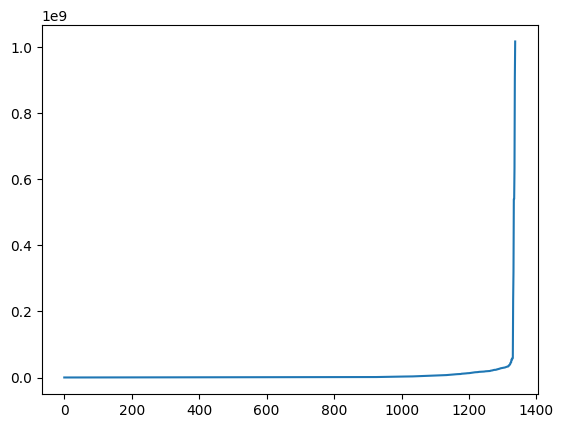

In [43]:
plt.plot(distances)

In [44]:
X.shape

(1338, 8)

In [45]:
dbscan = DBSCAN(eps=0.1*(10**9),min_samples=17)
predict = dbscan.fit_predict(X)

In [46]:
X[predict==-1]

,age,bmi,children,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,charges
1181,61.0,29.920,3.0,15.0,1041377.0,2.0,1.046124e+09,30942.19180
1325,60.0,40.920,0.0,20.0,1072525.0,2.0,2.431618e+09,48673.55880
1326,57.0,42.130,1.0,20.0,1083241.0,2.0,2.463222e+09,48675.51770
1327,63.0,37.700,0.0,35.0,1085496.0,2.0,2.446348e+09,48824.45000
1328,44.0,38.060,0.0,25.0,1072324.0,2.0,2.430290e+09,48885.13561
1330,64.0,36.960,2.0,28.0,1091279.0,2.0,2.489508e+09,49577.66240
1331,28.0,36.400,1.0,26.0,1080113.0,2.0,2.682705e+09,51194.55914
1332,60.0,32.800,0.0,40.0,1095960.0,2.0,2.780642e+09,52590.82939
1333,33.0,35.530,0.0,32.0,1091267.0,2.0,3.101107e+09,55135.40209
1334,31.0,38.095,1.0,31.0,1107872.0,2.0,3.484216e+09,58571.07448


In [47]:
np.unique(predict)

array([-1,  0,  1,  2], dtype=int64)

In [48]:
len(np.where(predict==0)[0])

1182

In [49]:
idx = np.where(predict==1)[0]

In [50]:
idx

array([1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193,
       1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204,
       1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215,
       1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226,
       1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237,
       1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248,
       1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259,
       1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270,
       1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281,
       1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292,
       1293, 1294, 1295, 1296, 1297, 1298, 1300], dtype=int64)

In [51]:
df.loc[idx]

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
1183,44.0,male,29.735,2.0,no,16.0,1053649.0,2.0,1.067296e+09,northeast,32108.66282
1184,19.0,male,30.250,0.0,yes,24.0,1050415.0,2.0,1.152574e+09,southeast,32548.34050
1185,32.0,female,17.765,2.0,yes,22.0,1053386.0,2.0,1.126181e+09,northwest,32734.18630
1186,42.0,male,28.310,3.0,yes,16.0,1044862.0,2.0,1.080461e+09,northwest,32787.45859
1187,19.0,female,30.020,0.0,yes,26.0,1049111.0,2.0,1.125743e+09,northwest,33307.55080
...,...,...,...,...,...,...,...,...,...,...,...
1295,51.0,female,38.060,0.0,yes,30.0,1072838.0,2.0,2.060998e+09,southeast,44400.40640
1296,55.0,female,35.200,0.0,yes,33.0,1069003.0,2.0,2.058096e+09,southeast,44423.80300
1297,22.0,male,52.580,1.0,yes,26.0,1070847.0,2.0,2.001538e+09,southeast,44501.39820
1298,29.0,male,35.500,2.0,yes,28.0,1080849.0,2.0,2.064737e+09,southwest,44585.45587


In [52]:
len(df[~df.index.isin(idx)])

1221

In [53]:
df.index.isin([0])

array([ True, False, False, ..., False, False, False])

In [54]:
idx

array([1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193,
       1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204,
       1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215,
       1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226,
       1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237,
       1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248,
       1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259,
       1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270,
       1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281,
       1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292,
       1293, 1294, 1295, 1296, 1297, 1298, 1300], dtype=int64)

In [55]:
df.index.isin(idx)

array([False, False, False, ..., False, False, False])

In [56]:
df[~df.index.isin(idx)].reset_index(drop=True)

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,17.0,715428.0,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,7.0,699157.0,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,19.0,702341.0,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,11.0,700250.0,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,16.0,711584.0,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...
1216,33.0,female,35.530,0.0,yes,32.0,1091267.0,2.0,3.101107e+09,northwest,55135.40209
1217,31.0,female,38.095,1.0,yes,31.0,1107872.0,2.0,3.484216e+09,northeast,58571.07448
1218,52.0,male,34.485,3.0,yes,25.0,1092005.0,2.0,3.640807e+09,northwest,60021.39897
1219,45.0,male,30.360,0.0,yes,34.0,1106821.0,3.0,4.006359e+09,southeast,62592.87309


In [57]:
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

In [58]:
neighbors = NearestNeighbors(n_neighbors=5).fit(X)
distances,_ = neighbors.kneighbors(X)
kth_distances = distances[:,-1]
threshold = np.mean(kth_distances) + 2 * np.std(kth_distances)
outliers = X_transformed[kth_distances > threshold]

In [59]:
outliers

array([[2.31068675e+09, 1.05827118e+05],
       [2.40862443e+09, 1.01712207e+05],
       [2.72908961e+09, 1.44821458e+05],
       [3.11219836e+09, 1.74152987e+05],
       [3.26878892e+09, 2.08760961e+05],
       [3.63434074e+09, 2.37812700e+05],
       [3.74517887e+09, 2.57569673e+05]])

In [60]:
outliers

array([[2.31068675e+09, 1.05827118e+05],
       [2.40862443e+09, 1.01712207e+05],
       [2.72908961e+09, 1.44821458e+05],
       [3.11219836e+09, 1.74152987e+05],
       [3.26878892e+09, 2.08760961e+05],
       [3.63434074e+09, 2.37812700e+05],
       [3.74517887e+09, 2.57569673e+05]])

In [61]:
normal_X = X_transformed[kth_distances <= threshold]

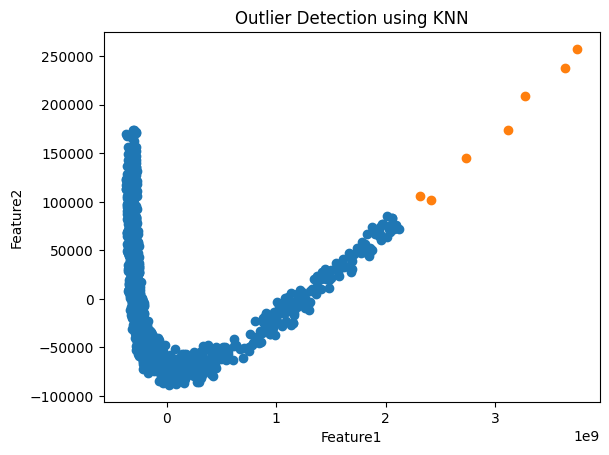

In [62]:
plt.title("Outlier Detection using KNN")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.scatter(x=normal_X[:,0],y=normal_X[:,1])
plt.scatter(x=outliers[:,0],y=outliers[:,1])
plt.show()

In [63]:
normal_X1 = X[kth_distances <= threshold]

In [64]:
normal_X1

,age,bmi,children,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,charges
0,18.0,23.21,0.0,17.0,715428.0,0.0,5.578497e+07,1121.87390
1,18.0,30.14,0.0,7.0,699157.0,0.0,1.370089e+07,1131.50660
2,18.0,33.33,0.0,19.0,702341.0,0.0,7.352311e+07,1135.94070
3,18.0,33.66,0.0,11.0,700250.0,0.0,7.581968e+07,1136.39940
4,18.0,34.10,0.0,16.0,711584.0,0.0,2.301232e+07,1137.01100
...,...,...,...,...,...,...,...,...
1326,57.0,42.13,1.0,20.0,1083241.0,2.0,2.463222e+09,48675.51770
1327,63.0,37.70,0.0,35.0,1085496.0,2.0,2.446348e+09,48824.45000
1328,44.0,38.06,0.0,25.0,1072324.0,2.0,2.430290e+09,48885.13561
1329,59.0,41.14,1.0,38.0,1079931.0,2.0,2.399896e+09,48970.24760


In [65]:
dbscan = DBSCAN(eps=4000,min_samples=5)
predict = dbscan.fit_predict(normal_X1)

In [66]:
np.unique(predict)

array([-1], dtype=int64)

In [67]:
negihbors = NearestNeighbors(n_neighbors=5).fit(normal_X1)
distance,_ = negihbors.kneighbors(normal_X1)
distance = np.sort(distances[:,-1])

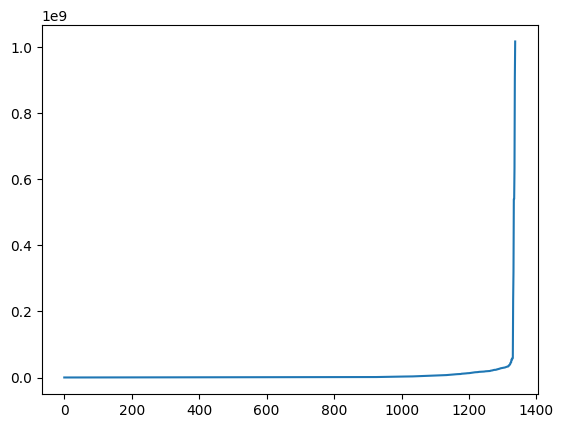

In [68]:
plt.plot(distance)

In [69]:
dbscan = DBSCAN(eps=0.1*(10**9),min_samples=17)
predict = dbscan.fit_predict(normal_X1)
np.unique(predict)

array([-1,  0,  1,  2], dtype=int64)

In [70]:
np.unique(predict)

array([-1,  0,  1,  2], dtype=int64)

In [71]:
normal_X1[predict==-1]

,age,bmi,children,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,charges
1181,61.0,29.92,3.0,15.0,1041377.0,2.0,1.046124e+09,30942.19180
1325,60.0,40.92,0.0,20.0,1072525.0,2.0,2.431618e+09,48673.55880
1326,57.0,42.13,1.0,20.0,1083241.0,2.0,2.463222e+09,48675.51770
1327,63.0,37.70,0.0,35.0,1085496.0,2.0,2.446348e+09,48824.45000
1328,44.0,38.06,0.0,25.0,1072324.0,2.0,2.430290e+09,48885.13561
1330,64.0,36.96,2.0,28.0,1091279.0,2.0,2.489508e+09,49577.66240


In [72]:
normal_X2 = normal_X1[predict!=-1]

In [73]:
normal_X2.reset_index(drop=True)

,age,bmi,children,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,charges
0,18.0,23.210,0.0,17.0,715428.0,0.0,5.578497e+07,1121.87390
1,18.0,30.140,0.0,7.0,699157.0,0.0,1.370089e+07,1131.50660
2,18.0,33.330,0.0,19.0,702341.0,0.0,7.352311e+07,1135.94070
3,18.0,33.660,0.0,11.0,700250.0,0.0,7.581968e+07,1136.39940
4,18.0,34.100,0.0,16.0,711584.0,0.0,2.301232e+07,1137.01100
...,...,...,...,...,...,...,...,...
1320,64.0,33.800,1.0,38.0,1064345.0,2.0,2.380291e+09,47928.03000
1321,60.0,39.900,0.0,33.0,1084625.0,2.0,2.409971e+09,48173.36100
1322,61.0,36.385,1.0,35.0,1077227.0,2.0,2.401083e+09,48517.56315
1323,54.0,40.565,3.0,35.0,1086594.0,2.0,2.381944e+09,48549.17835


In [74]:
pca = PCA(n_components=2)
normal_X2_transformed = pca.fit_transform(normal_X2)

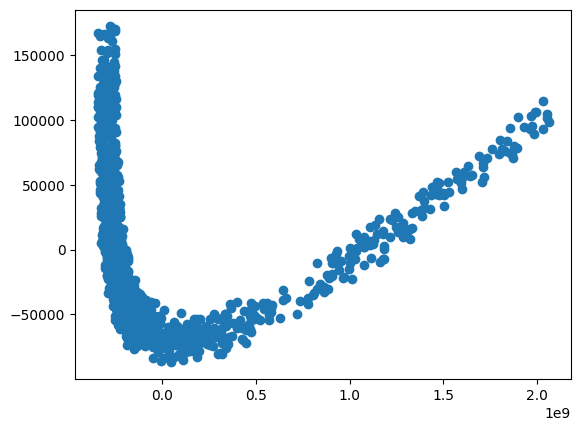

In [75]:
plt.scatter(x=normal_X2_transformed[:,0],y=normal_X2_transformed[:,1])
plt.show()

In [76]:
df1 = df.copy()
df2 = df

In [77]:
normal_X2

,age,bmi,children,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,charges
0,18.0,23.210,0.0,17.0,715428.0,0.0,5.578497e+07,1121.87390
1,18.0,30.140,0.0,7.0,699157.0,0.0,1.370089e+07,1131.50660
2,18.0,33.330,0.0,19.0,702341.0,0.0,7.352311e+07,1135.94070
3,18.0,33.660,0.0,11.0,700250.0,0.0,7.581968e+07,1136.39940
4,18.0,34.100,0.0,16.0,711584.0,0.0,2.301232e+07,1137.01100
...,...,...,...,...,...,...,...,...
1321,64.0,33.800,1.0,38.0,1064345.0,2.0,2.380291e+09,47928.03000
1322,60.0,39.900,0.0,33.0,1084625.0,2.0,2.409971e+09,48173.36100
1323,61.0,36.385,1.0,35.0,1077227.0,2.0,2.401083e+09,48517.56315
1324,54.0,40.565,3.0,35.0,1086594.0,2.0,2.381944e+09,48549.17835


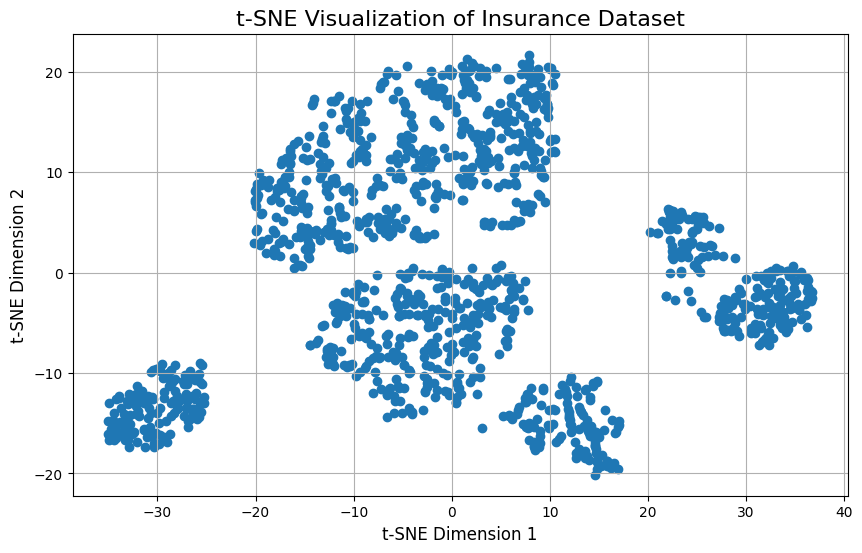

In [78]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(normal_X2)
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=500)
X_tsne = tsne.fit_transform(scaled_X)

# Create a DataFrame for easier visualization
result_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])

# Visualize the data
plt.figure(figsize=(10, 6))

plt.scatter(result_df['TSNE1'], result_df['TSNE2'])

plt.title('t-SNE Visualization of Insurance Dataset', fontsize=16)
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.grid(True)
plt.show()


In [79]:
merged_df = pd.merge(normal_X2, df.select_dtypes('object'), left_index=True, right_index=True)


In [80]:
merged_df.isnull().sum()

age                                0
bmi                                0
children                           0
past_consultations                 0
num_of_steps                       0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
charges                            0
sex                                0
smoker                             0
region                             0
dtype: int64

In [81]:
# df = merged_df.reset_index(drop=True)

## EDA

In [82]:
num_cols = df.select_dtypes('number').columns

In [83]:
cat_cols = df.select_dtypes('object').columns

In [84]:
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [85]:
num_cols

Index(['age', 'bmi', 'children', 'past_consultations', 'num_of_steps',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'charges'],
      dtype='object')

In [86]:
def plot_boxplot(x):
    plt.title(f"Box Plot {x}")
    plt.xlabel(x)
    sns.boxplot(df[x])
    plt.show()

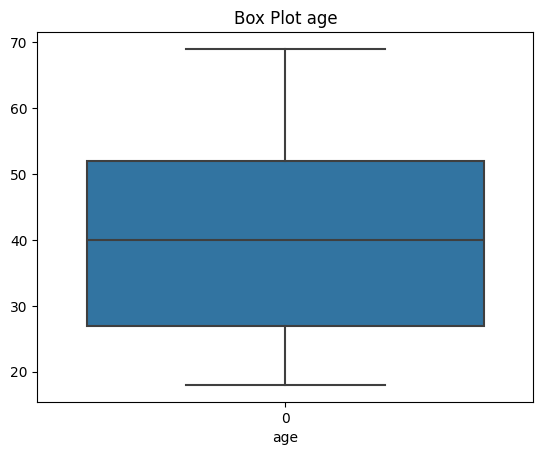

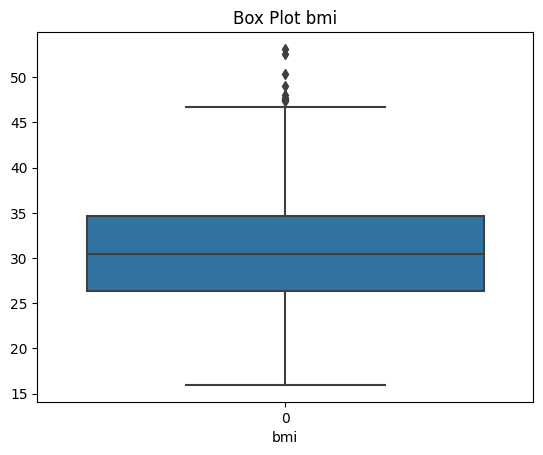

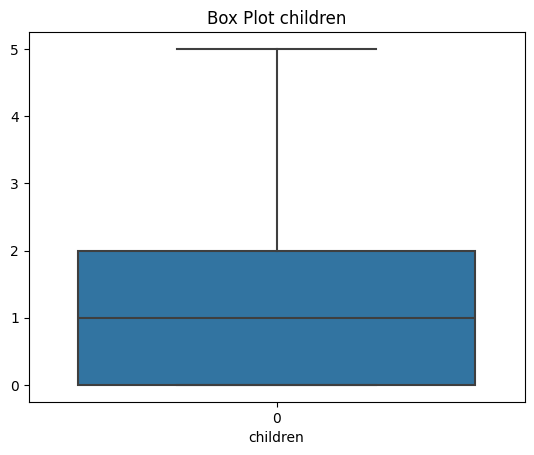

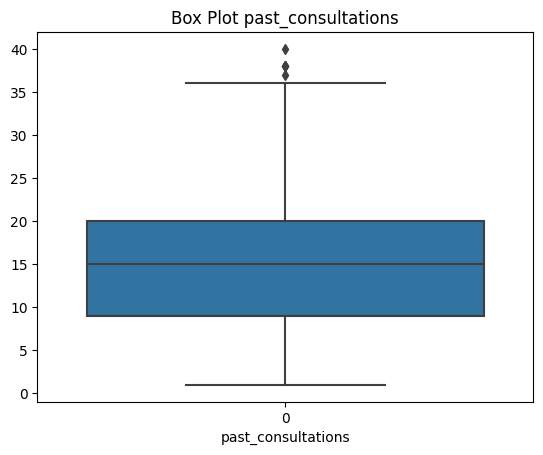

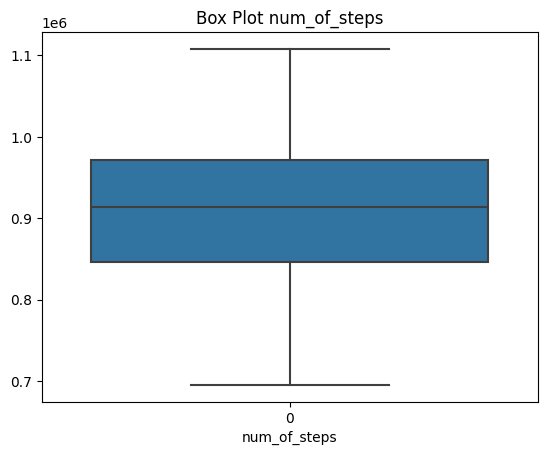

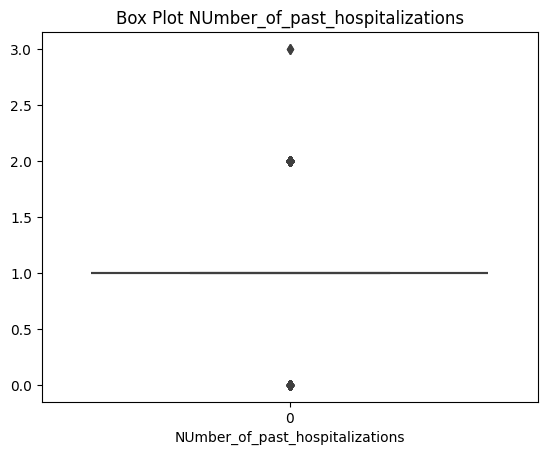

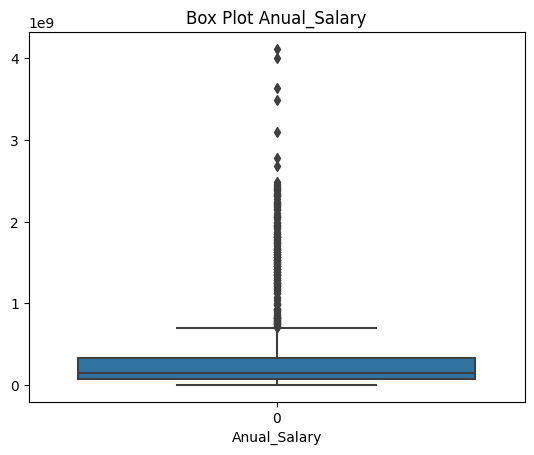

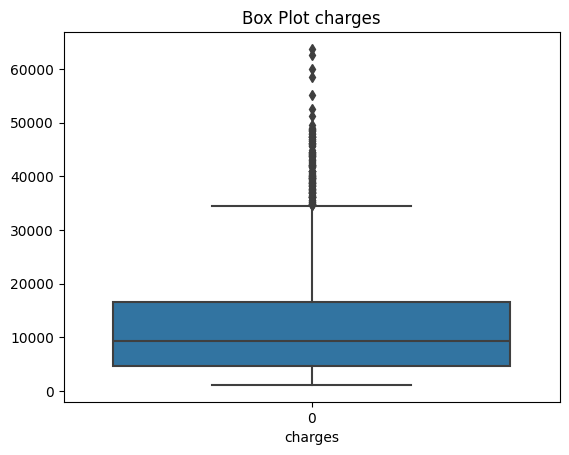

In [87]:
for col in num_cols:
    plot_boxplot(col)

<Axes: >

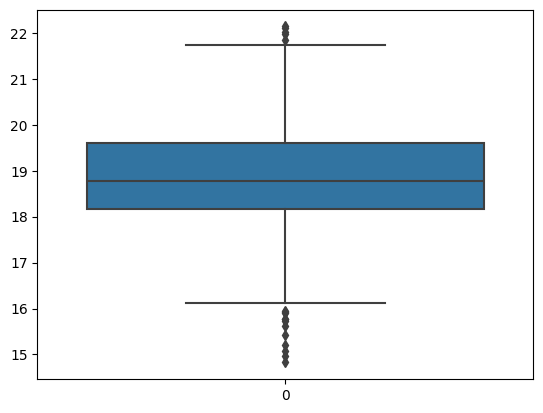

In [88]:
df['salary_log'] = np.log1p(df['Anual_Salary'])
sns.boxplot(df['salary_log'])

**Scatter Plot**

In [89]:
def plot_scatter(x):
    plt.title(f"Scatter plot {x} and Charges")
    plt.xlabel(x)
    plt.ylabel("Charges")
    plt.scatter(x=df[x],y=df['charges'])
    plt.show()

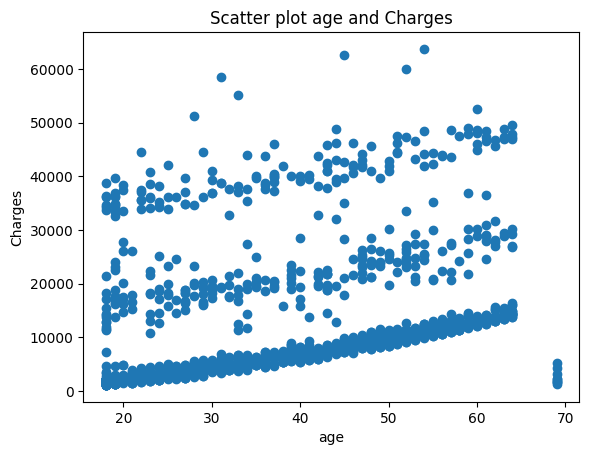

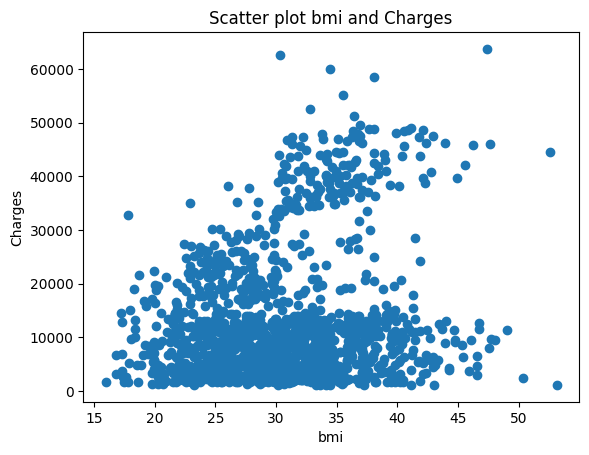

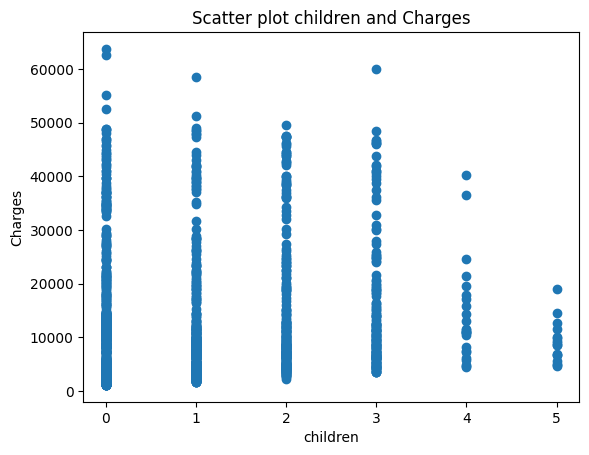

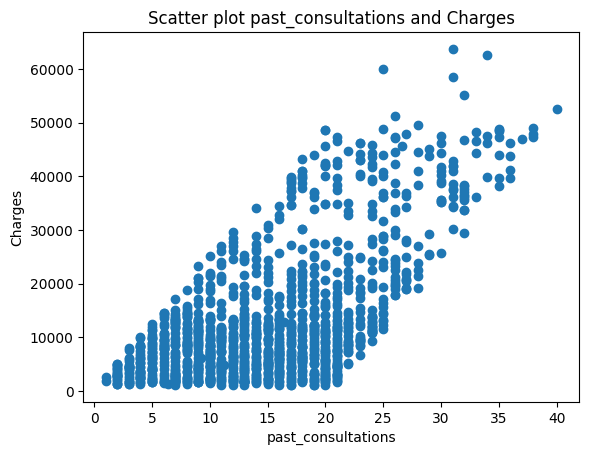

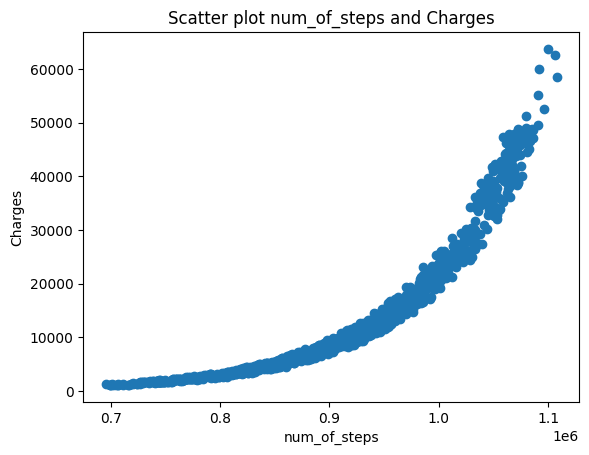

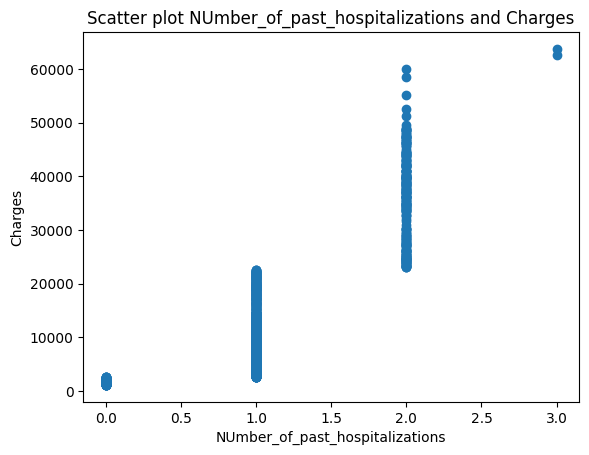

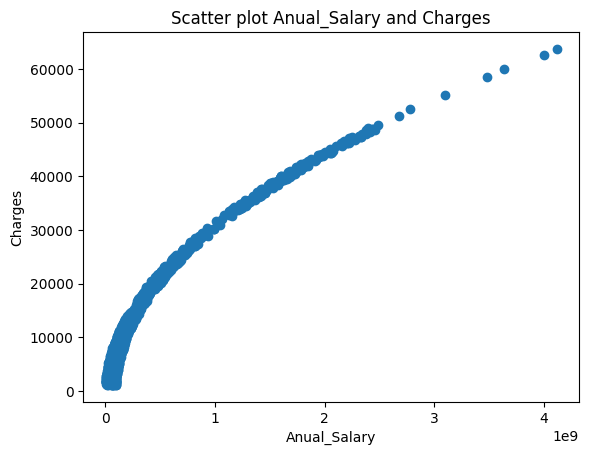

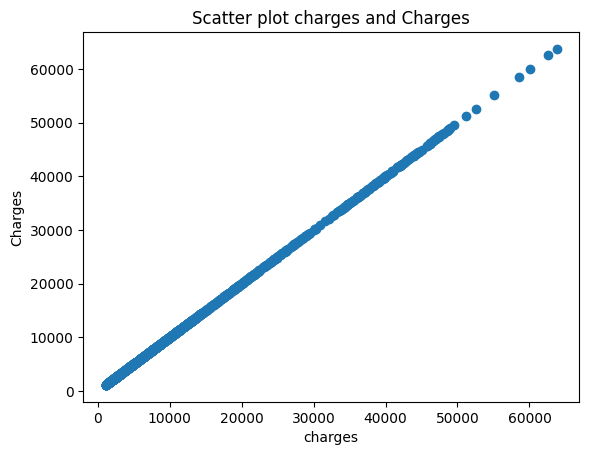

In [90]:
for col in num_cols:
    plot_scatter(col)

**Histogram**

In [91]:
def plot_hist(x):
    plt.title(f"Histogram for {x}")
    plt.xlabel(x)
    plt.ylabel("Frequency")
    sns.histplot(df[col],kde=True)
    plt.show()

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


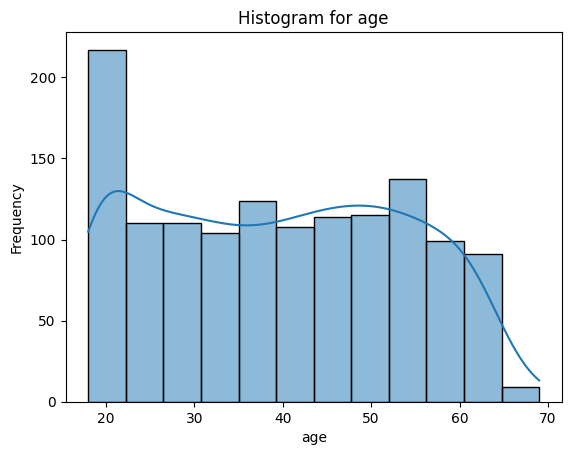

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


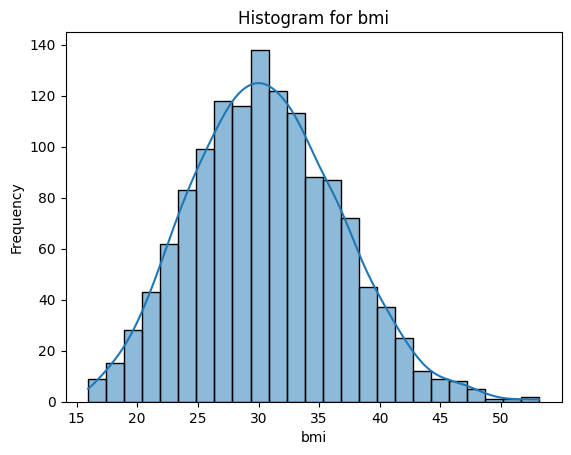

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


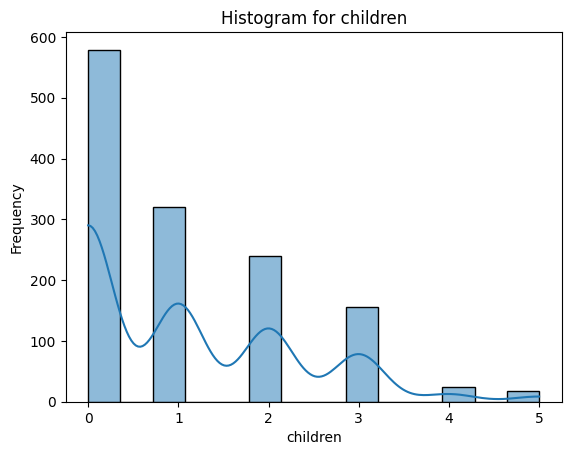

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


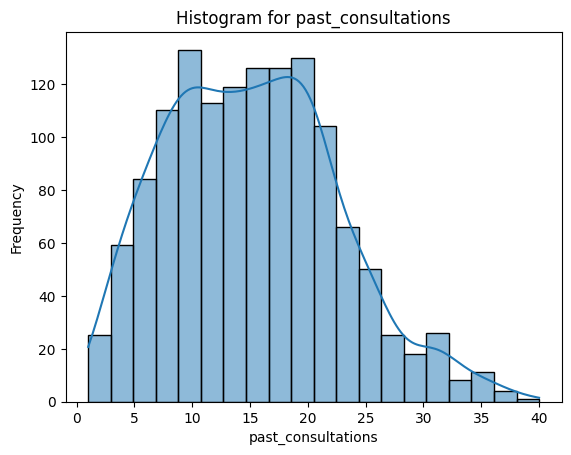

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


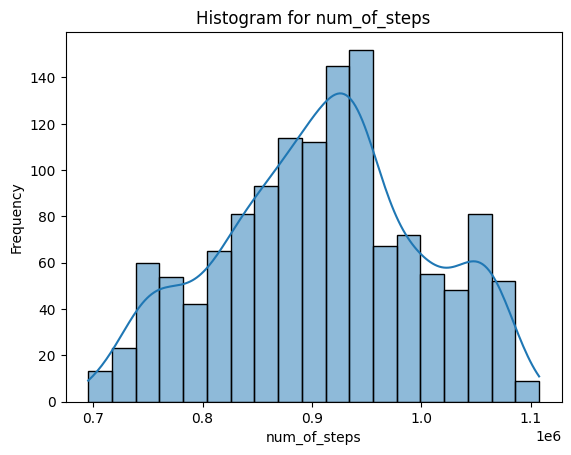

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


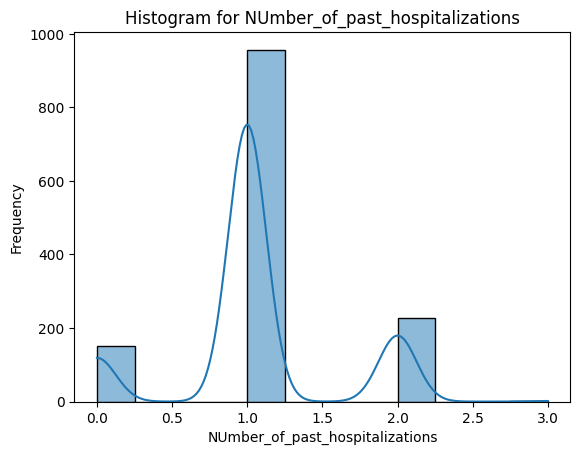

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


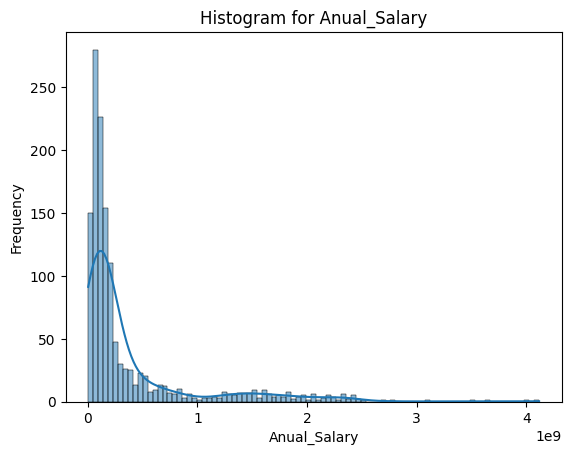

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


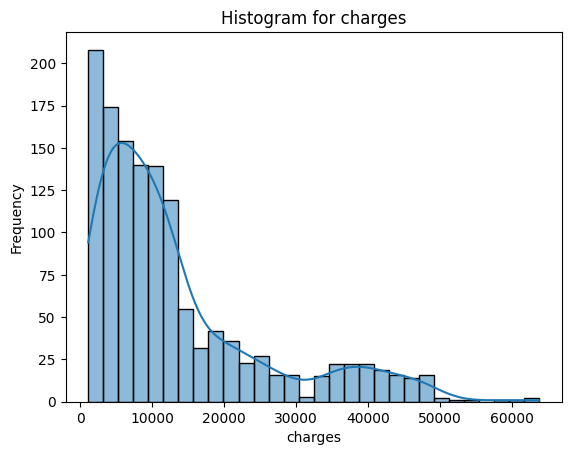

In [92]:
for col in num_cols:
    plot_hist(col)

In [93]:
df.drop('Anual_Salary',axis=1,inplace=True)

In [94]:
df.head()

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,region,charges,salary_log
0,18.0,male,23.21,0.0,no,17.0,715428.0,0.0,southeast,1121.8739,17.837015
1,18.0,male,30.14,0.0,no,7.0,699157.0,0.0,southeast,1131.5066,16.432971
2,18.0,male,33.33,0.0,no,19.0,702341.0,0.0,southeast,1135.9407,18.113110
3,18.0,male,33.66,0.0,no,11.0,700250.0,0.0,southeast,1136.3994,18.143868
4,18.0,male,34.10,0.0,no,16.0,711584.0,0.0,southeast,1137.0110,16.951540


Categorical Data

In [95]:
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

Bar Plot

In [96]:
def plot_bar(x):
    plt.title(f"Bar plot for {x}")
    plt.xlabel(x)
    data = df[x].value_counts()
    plt.bar(data.index,data.values)
    plt.show()

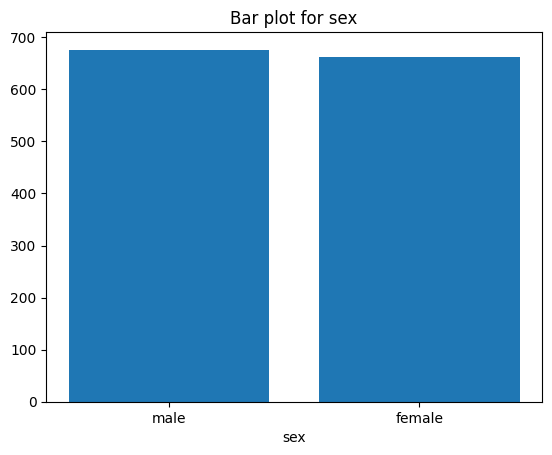

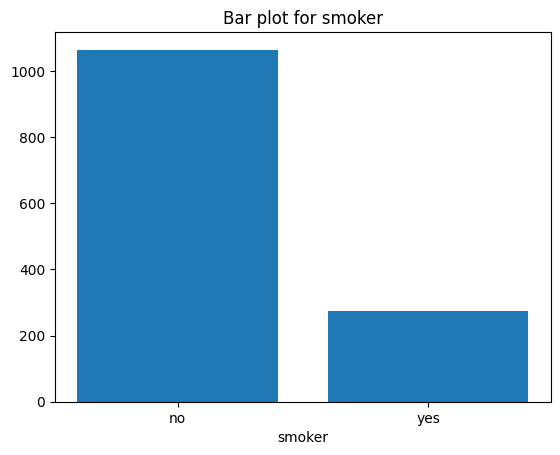

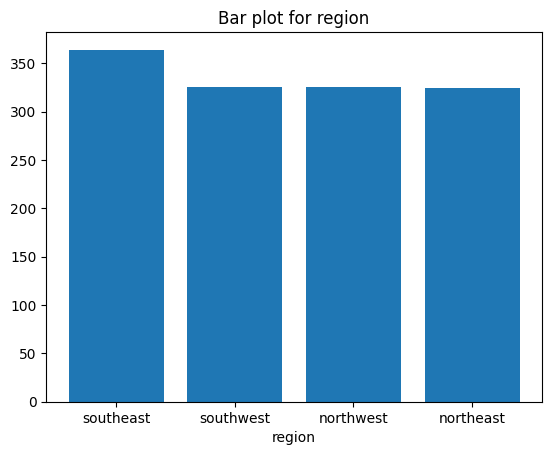

In [97]:
for col in cat_cols:
    plot_bar(col)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-

<Axes: xlabel='charges', ylabel='Density'>

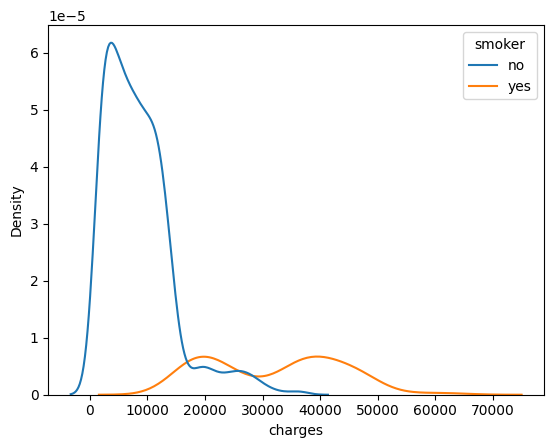

In [98]:
sns.kdeplot(data=df, x="charges", hue="smoker")

Encode

In [99]:
df

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,region,charges,salary_log
0,18.0,male,23.210,0.0,no,17.0,715428.0,0.0,southeast,1121.87390,17.837015
1,18.0,male,30.140,0.0,no,7.0,699157.0,0.0,southeast,1131.50660,16.432971
2,18.0,male,33.330,0.0,no,19.0,702341.0,0.0,southeast,1135.94070,18.113110
3,18.0,male,33.660,0.0,no,11.0,700250.0,0.0,southeast,1136.39940,18.143868
4,18.0,male,34.100,0.0,no,16.0,711584.0,0.0,southeast,1137.01100,16.951540
...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,32.0,1091267.0,2.0,northwest,55135.40209,21.855025
1334,31.0,female,38.095,1.0,yes,31.0,1107872.0,2.0,northeast,58571.07448,21.971509
1335,52.0,male,34.485,3.0,yes,25.0,1092005.0,2.0,northwest,60021.39897,22.015471
1336,45.0,male,30.360,0.0,yes,34.0,1106821.0,3.0,southeast,62592.87309,22.111149


In [100]:
def relation_with_target(x):
    print(df.groupby(x)['charges'].mean())
    print(df.groupby(x)['charges'].median())


In [101]:
for col in cat_cols:
    relation_with_target(col)

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64
sex
female    9412.96250
male      9369.61575
Name: charges, dtype: float64
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64
smoker
no      7345.40530
yes    34456.34845
Name: charges, dtype: float64
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64
region
northeast    10057.652025
northwest     8965.795750
southeast     9294.131950
southwest     8798.593000
Name: charges, dtype: float64


Here we can coclude that there is a significant realtion with smokers and charges

## Data Preparation

In [102]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [103]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [104]:
df[cat_cols]

,sex,smoker,region
0,male,no,southeast
1,male,no,southeast
2,male,no,southeast
3,male,no,southeast
4,male,no,southeast
...,...,...,...
1333,female,yes,northwest
1334,female,yes,northeast
1335,male,yes,northwest
1336,male,yes,southeast


In [105]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
sex_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[['sex']]),columns=one_hot_encoder.get_feature_names_out())
region_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[['region']]),columns=one_hot_encoder.get_feature_names_out())
df_encoded = pd.concat([df,region_encoded,sex_encoded],axis=1)

In [106]:
ordinal_encoder = OrdinalEncoder(categories=[['no','yes']])
df_encoded['smoker_encoded'] = ordinal_encoder.fit_transform(df[['smoker']])

In [107]:
df_encoded = df_encoded.drop(['region','sex','smoker'],axis=1)

In [108]:
df_encoded.head()

,age,bmi,children,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,charges,salary_log,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_encoded
0,18.0,23.21,0.0,17.0,715428.0,0.0,1121.8739,17.837015,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,18.0,30.14,0.0,7.0,699157.0,0.0,1131.5066,16.432971,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,18.0,33.33,0.0,19.0,702341.0,0.0,1135.9407,18.113110,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,18.0,33.66,0.0,11.0,700250.0,0.0,1136.3994,18.143868,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,18.0,34.10,0.0,16.0,711584.0,0.0,1137.0110,16.951540,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [109]:
df_encoded.corr()

,age,bmi,children,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,charges,salary_log,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_encoded
age,1.000000,0.110156,0.033935,0.158549,0.488537,0.337313,0.276876,0.345250,-0.009607,0.008516,-0.008348,0.009744,0.014280,-0.014280,-0.035584
bmi,0.110156,1.000000,0.005897,0.133583,0.133272,0.141527,0.198691,0.163741,-0.138391,-0.137404,0.271692,-0.006292,-0.045170,0.045170,0.003610
children,0.033935,0.005897,1.000000,0.057665,0.165447,0.187459,0.072874,0.095587,-0.023373,0.027316,-0.018959,0.015707,-0.017915,0.017915,0.011173
past_consultations,0.158549,0.133583,0.057665,1.000000,0.563322,0.508143,0.631317,0.591479,-0.007404,-0.007211,0.044701,-0.031780,-0.049166,0.049166,0.505566
num_of_steps,0.488537,0.133272,0.165447,0.563322,1.000000,0.851515,0.890382,0.910616,0.040545,-0.014354,0.015408,-0.042138,-0.007016,0.007016,0.665492
NUmber_of_past_hospitalizations,0.337313,0.141527,0.187459,0.508143,0.851515,1.000000,0.823849,0.793047,0.017583,0.004322,0.021887,-0.044598,-0.000213,0.000213,0.590605
charges,0.276876,0.198691,0.072874,0.631317,0.890382,0.823849,1.000000,0.923469,0.006349,-0.039905,0.073982,-0.043210,-0.057292,0.057292,0.787251
salary_log,0.345250,0.163741,0.095587,0.591479,0.910616,0.793047,0.923469,1.000000,0.014381,-0.024079,0.061093,-0.053685,-0.039692,0.039692,0.722472
region_northeast,-0.009607,-0.138391,-0.023373,-0.007404,0.040545,0.017583,0.006349,0.014381,1.000000,-0.320177,-0.345561,-0.320177,0.002425,-0.002425,0.002811
region_northwest,0.008516,-0.137404,0.027316,-0.007211,-0.014354,0.004322,-0.039905,-0.024079,-0.320177,1.000000,-0.346265,-0.320829,0.011156,-0.011156,-0.036945


In [110]:
df_encoded = df_encoded.drop(['sex_female','num_of_steps'],axis=1)

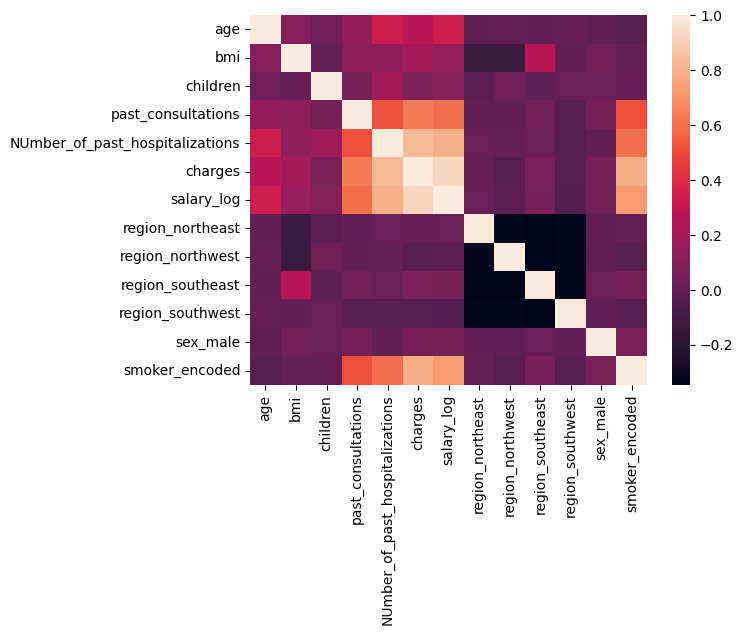

In [111]:
sns.heatmap(df_encoded.corr())
plt.show()

In [112]:
mid = len(df_encoded.columns) // 2

In [113]:
df_encoded.columns[:mid]

Index(['age', 'bmi', 'children', 'past_consultations',
       'NUmber_of_past_hospitalizations', 'charges'],
      dtype='object')

In [114]:
df_encoded

,age,bmi,children,past_consultations,NUmber_of_past_hospitalizations,charges,salary_log,region_northeast,region_northwest,region_southeast,region_southwest,sex_male,smoker_encoded
0,18.0,23.210,0.0,17.0,0.0,1121.87390,17.837015,0.0,0.0,1.0,0.0,1.0,0.0
1,18.0,30.140,0.0,7.0,0.0,1131.50660,16.432971,0.0,0.0,1.0,0.0,1.0,0.0
2,18.0,33.330,0.0,19.0,0.0,1135.94070,18.113110,0.0,0.0,1.0,0.0,1.0,0.0
3,18.0,33.660,0.0,11.0,0.0,1136.39940,18.143868,0.0,0.0,1.0,0.0,1.0,0.0
4,18.0,34.100,0.0,16.0,0.0,1137.01100,16.951540,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,35.530,0.0,32.0,2.0,55135.40209,21.855025,0.0,1.0,0.0,0.0,0.0,1.0
1334,31.0,38.095,1.0,31.0,2.0,58571.07448,21.971509,1.0,0.0,0.0,0.0,0.0,1.0
1335,52.0,34.485,3.0,25.0,2.0,60021.39897,22.015471,0.0,1.0,0.0,0.0,1.0,1.0
1336,45.0,30.360,0.0,34.0,3.0,62592.87309,22.111149,0.0,0.0,1.0,0.0,1.0,1.0


In [115]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded.drop('charges',axis=1))

In [116]:
cols = df_encoded.columns

In [117]:
cols[cols!='charges']

Index(['age', 'bmi', 'children', 'past_consultations',
       'NUmber_of_past_hospitalizations', 'salary_log', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest', 'sex_male',
       'smoker_encoded'],
      dtype='object')

In [118]:
df_scaled_df = pd.DataFrame(df_scaled,columns=cols[cols!='charges'])

In [119]:
df_scaled_df

,age,bmi,children,past_consultations,NUmber_of_past_hospitalizations,salary_log,region_northeast,region_northwest,region_southeast,region_southwest,sex_male,smoker_encoded
0,-1.515696,-1.223642,-0.904824,0.240181,-1.984577,-0.903629,-0.565267,-0.566418,1.635795,-0.566418,0.989591,-0.507463
1,-1.515696,-0.086189,-0.904824,-1.099833,-1.984577,-2.053969,-0.565267,-0.566418,1.635795,-0.566418,0.989591,-0.507463
2,-1.515696,0.437400,-0.904824,0.508184,-1.984577,-0.677423,-0.565267,-0.566418,1.635795,-0.566418,0.989591,-0.507463
3,-1.515696,0.491565,-0.904824,-0.563828,-1.984577,-0.652223,-0.565267,-0.566418,1.635795,-0.566418,0.989591,-0.507463
4,-1.515696,0.563784,-0.904824,0.106180,-1.984577,-1.629103,-0.565267,-0.566418,1.635795,-0.566418,0.989591,-0.507463
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,-0.458711,0.798496,-0.904824,2.250203,1.758008,2.388346,-0.565267,1.765481,-0.611324,-0.566418,-1.010519,1.970587
1334,-0.599643,1.219501,-0.072187,2.116201,1.758008,2.483782,1.769076,-0.566418,-0.611324,-0.566418,-1.010519,1.970587
1335,0.880136,0.626976,1.593088,1.312193,1.758008,2.519801,-0.565267,1.765481,-0.611324,-0.566418,0.989591,1.970587
1336,0.386876,-0.050079,-0.904824,2.518206,3.629300,2.598190,-0.565267,-0.566418,1.635795,-0.566418,0.989591,1.970587


## Modelling

In [120]:
X,y = df_scaled_df,df_encoded['charges']

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [124]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
linear_model.score(X_train,y_train)

0.9098897553511952

In [125]:
pred = linear_model.predict(X_test)

In [126]:
mean_absolute_error(pred,y_test)

2521.7517420513177

In [127]:
mean_squared_error(pred,y_test)

11198896.569190854

In [128]:
np.sqrt(mean_squared_error(pred,y_test))

3346.475245566722

In [129]:
r2_score(pred,y_test)

0.9182922304989882

In [130]:
linear_model.coef_

array([ 166.2676361 ,  806.08169249, -254.7910509 ,  981.19495037,
       2975.8247446 , 5801.14700669,    7.57106543,  -75.26126665,
         12.17238795,   55.06649315,  152.39776638, 2980.12264447])

In [131]:
linear_model.coef_ > 700

array([False,  True, False,  True,  True,  True, False, False, False,
       False, False,  True])

In [132]:
cols = cols[cols!='charges']

In [133]:
cols[linear_model.coef_ > 700]

Index(['bmi', 'past_consultations', 'NUmber_of_past_hospitalizations',
       'salary_log', 'smoker_encoded'],
      dtype='object')

In [134]:
cols[linear_model.coef_ > 700]

Index(['bmi', 'past_consultations', 'NUmber_of_past_hospitalizations',
       'salary_log', 'smoker_encoded'],
      dtype='object')

In [237]:
def evaluate(model):
    pred = model.predict(X_test)
    print(f"MSE: {mean_squared_error(pred,y_test)}")
    print(f"MAE: {mean_absolute_error(pred,y_test)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(pred,y_test))}")

In [238]:
from sklearn.tree import DecisionTreeRegressor,export_graphviz,plot_tree,export_text,tests
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [239]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [241]:
pred = tree.predict(X_test)

In [242]:
export_graphviz(tree)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[4] <= 0.822\\nsquared_error = 143149743.026\\nsamples = 1070\\nvalue = 13164.578"] ;\n1 [label="x[5] <= -0.139\\nsquared_error = 28648815.03\\nsamples = 890\\nvalue = 8516.029"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="x[0] <= -0.494\\nsquared_error = 6559850.312\\nsamples = 533\\nvalue = 4975.166"] ;\n1 -> 2 ;\n3 [label="x[4] <= -1.049\\nsquared_error = 1544637.436\\nsamples = 277\\nvalue = 3014.755"] ;\n2 -> 3 ;\n4 [label="x[0] <= -1.41\\nsquared_error = 160011.779\\nsamples = 119\\nvalue = 1876.107"] ;\n3 -> 4 ;\n5 [label="x[10] <= -0.01\\nsquared_error = 137846.412\\nsamples = 65\\nvalue = 1677.36"] ;\n4 -> 5 ;\n6 [label="x[6] <= 0.602\\nsquared_error = 71362.532\\nsamples = 29\\nvalue = 1924.232"] ;\n5 -> 6 ;\n7 [label="x[2] <= -0.489\\nsquared_error = 60567.275\\nsamples = 22\\nvalue = 1834.321"] ;\n6 -> 7 ;\n8 [label="x[7] <= 0.6\\nsquared_erro

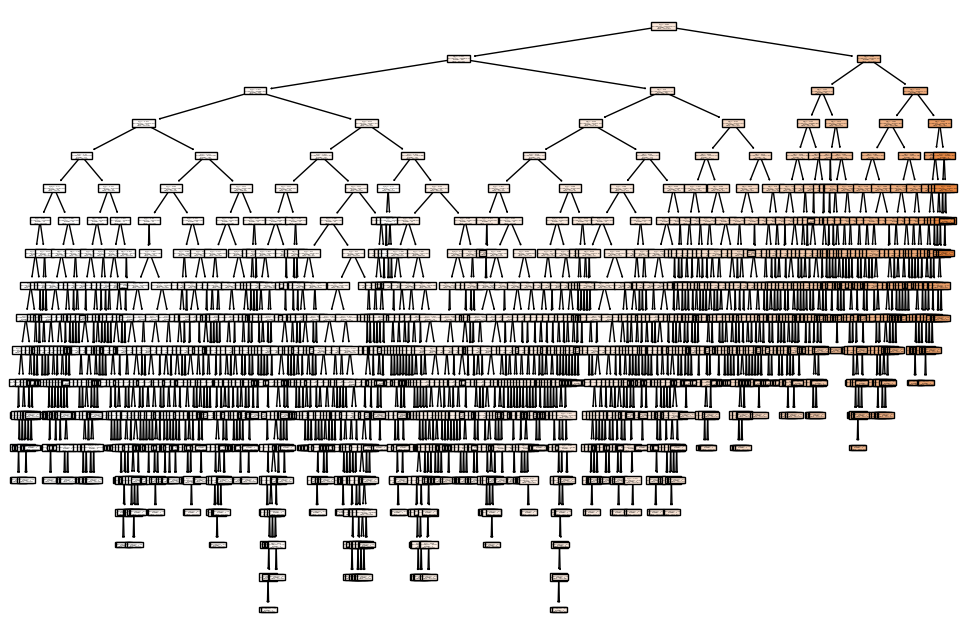

In [243]:
plt.figure(figsize=(12, 8))
plot_tree(tree,filled=True)
plt.show()

In [244]:
tree_rules = export_text(tree, feature_names=list(X_train.columns))
print(tree_rules)
with open('tree.pdf','w+') as file:
    file.write(tree_rules)


|--- NUmber_of_past_hospitalizations <= 0.82
|   |--- salary_log <= -0.14
|   |   |--- age <= -0.49
|   |   |   |--- NUmber_of_past_hospitalizations <= -1.05
|   |   |   |   |--- age <= -1.41
|   |   |   |   |   |--- sex_male <= -0.01
|   |   |   |   |   |   |--- region_northeast <= 0.60
|   |   |   |   |   |   |   |--- children <= -0.49
|   |   |   |   |   |   |   |   |--- region_northwest <= 0.60
|   |   |   |   |   |   |   |   |   |--- region_southwest <= 0.60
|   |   |   |   |   |   |   |   |   |   |--- bmi <= 0.67
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- bmi >  0.67
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- region_southwest >  0.60
|   |   |   |   |   |   |   |   |   |   |--- bmi <= -0.97
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- bmi >  -0.97
|   |

In [245]:
tree.get_depth()

18

In [246]:
evaluate(tree)

MSE: 1037321.4835944542
MAE: 582.5496432089552
RMSE: 1018.489805346354


In [247]:
evaluate(tree)

MSE: 1037321.4835944542
MAE: 582.5496432089552
RMSE: 1018.489805346354


In [248]:
params_grid = {
    'max_depth':[5,10,15],
    'min_samples_leaf':[2,5,10],
    'min_samples_split':[2,5,10]
}

In [249]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score,learning_curve

In [250]:
grid = GridSearchCV(estimator=tree,cv=4,verbose=2,n_jobs=-1,param_grid=params_grid)
grid.fit(X_train,y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


GridSearchCV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [251]:
grid.best_params_

{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [252]:
grid.best_score_

0.9958035633214298

In [253]:
params_dis = {
    'max_depth': [2,5,10,15,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[2,5,10]
    
}

In [254]:
random_search = RandomizedSearchCV(param_distributions=params_dis,estimator=tree,cv=5)

In [255]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [2, 5, 10, 15, 20],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [2, 5, 10]})

In [256]:
random_search.best_score_

0.9955750695928405

In [257]:
random_search.best_params_

{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}

In [258]:
evaluate(grid.best_estimator_)

MSE: 643871.6077850197
MAE: 531.4029896977612
RMSE: 802.4161063843495


In [259]:
evaluate(random_search.best_estimator_)

MSE: 1000299.7760974637
MAE: 558.993717677714
RMSE: 1000.1498768172016


In [260]:
evaluate(tree)

MSE: 1037321.4835944542
MAE: 582.5496432089552
RMSE: 1018.489805346354


In [271]:
cv = cross_val_score(estimator=grid,X=X_train,y=y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 4 folds for each of 27 candidates, totalling 108 fits


In [262]:
print("Cross-Validation Scores:", cv)
print("Mean Accuracy:", cv.mean())

Cross-Validation Scores: [0.99539063 0.99319387 0.99516705 0.99092762 0.99680383]
Mean Accuracy: 0.994296601344449


In [273]:
train_sizes,train_score,val_score = learning_curve(estimator=grid.best_estimator_,X=X_train,y=y_train)

In [274]:
train_sizes

array([ 85, 278, 470, 663, 856])

In [275]:
train_score

array([[0.99655297, 0.98978452, 0.98978452, 0.98978452, 0.98978452],
       [0.9979327 , 0.99907738, 0.99892328, 0.99892328, 0.99892328],
       [0.99897283, 0.99905101, 0.9988863 , 0.99905102, 0.99905102],
       [0.99944576, 0.99942345, 0.99900042, 0.99934503, 0.99939066],
       [0.99953523, 0.99953603, 0.99915257, 0.99934985, 0.99940881]])

In [276]:
val_score

array([[0.97660913, 0.98336426, 0.97903773, 0.96815357, 0.97743112],
       [0.99242997, 0.99182285, 0.99304844, 0.99080181, 0.99275553],
       [0.99550204, 0.99596884, 0.99574047, 0.99119734, 0.99603701],
       [0.99571509, 0.99362645, 0.99621934, 0.99461936, 0.9969154 ],
       [0.99590595, 0.99480316, 0.99291536, 0.99411691, 0.99691962]])

In [277]:
train_mean = train_score.mean(axis=1)
train_std = train_score.std(axis=1)
val_mean = val_score.mean(axis=1)
val_std = val_score.std(axis=1)

In [278]:
train_mean

array([0.99113821, 0.99875598, 0.99900244, 0.99932106, 0.9993965 ])

In [279]:
val_mean

array([0.97691916, 0.99217172, 0.99488914, 0.99541913, 0.9949322 ])

In [281]:
train_std

array([2.70738213e-03, 4.15947646e-04, 6.54931429e-05, 1.63867303e-04,
       1.41807214e-04])

In [282]:
val_std

array([0.0049643 , 0.00079681, 0.00185543, 0.00116791, 0.00138903])

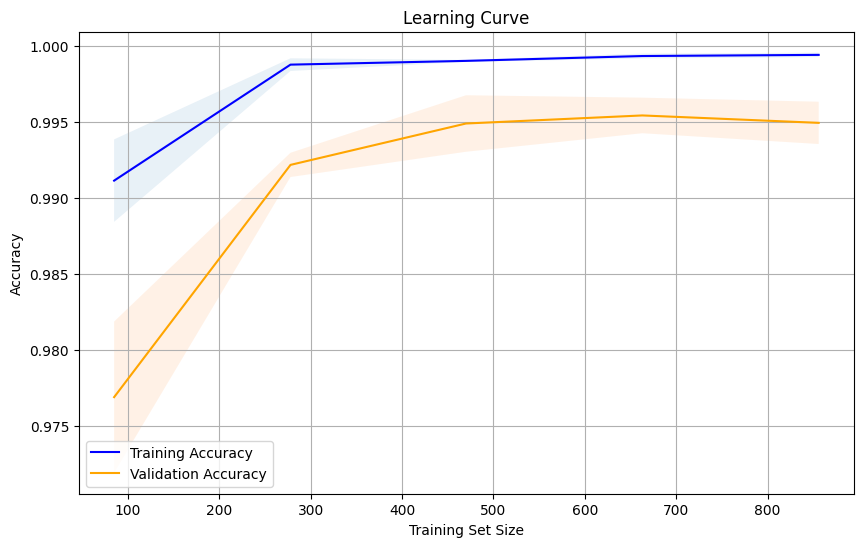

In [280]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes,train_mean - train_std,train_mean + train_std,alpha=0.1)
plt.fill_between(train_sizes,val_mean - val_std,val_mean + val_std,alpha=0.1)
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()